## Section 1- Data Cleaning

In [103]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [104]:
#Importing datasets
od1 = pd.read_excel('od1.xlsx', engine = 'openpyxl')
od2 = pd.read_excel('od2.xlsx', engine = 'openpyxl')
os = pd.read_excel('os.xlsx', engine = 'openpyxl')

Problem 1- merge od1.xlsx and 
od2.xlsx into a new file called “od.xlsx”. The file “od.xlsx” should have the same structure as 
“os.xlsx”.

In [105]:
#Merging datasets and sorting by ID
merged =pd.merge(od1, od2, how ='left', on=['dioptre_1', 'dioptre_2', 'Pachymetry', 'astigmatism', 'Diagnosis'])
sorted = merged.sort_values(by = ["ID"])

In [106]:
#Creating Sub-columns
def add_top_column(df, top_col, inplace=False):
    df.columns = pd.MultiIndex.from_product([[top_col], df.columns])
    return df
ID = sorted["ID"]
ID = pd.DataFrame(ID)
ID = add_top_column(ID, "")
Age = sorted["Age"]
Age = pd.DataFrame(Age)
Age = add_top_column(Age, "Age")
Gender = sorted["Gender"]
Gender = pd.DataFrame(Gender)
Gender = add_top_column(Gender, "Gender")
Diagnosis = sorted["Diagnosis"]
Diagnosis = pd.DataFrame(Diagnosis)
Diagnosis = add_top_column(Diagnosis, "Diagnosis")
Refractive_Defect = sorted[["dioptre_1", "dioptre_2", "astigmatism"]]
Refractive_Defect = pd.DataFrame(Refractive_Defect)
Refractive_Defect = add_top_column(Refractive_Defect, "Refractive_Defect")
PhakicPseudophakic = sorted["Phakic/Pseudophakic"]
PhakicPseudophakic = pd.DataFrame(PhakicPseudophakic)
PhakicPseudophakic = add_top_column(PhakicPseudophakic, "Phakic/Pseudophakic")
IOP = sorted[["Pneumatic","Perkins"]]
IOP = pd.DataFrame(IOP)
IOP = add_top_column(IOP, "IOP")
Pachymetry = sorted["Pachymetry"]
Pachymetry = pd.DataFrame(Pachymetry)
Pachymetry = add_top_column(Pachymetry, "Pachymetry")
Axial_Length = sorted["Axial_Length"]
Axial_Length = pd.DataFrame(Axial_Length)
Axial_Length = add_top_column(Axial_Length, "Axial_Length")
VF_MD = sorted["VF_MD"]
VF_MD = pd.DataFrame(VF_MD)
VF_MD = add_top_column(VF_MD, "VF_MD")
df_formatted = pd.concat([ID, Age, Gender, Diagnosis, Refractive_Defect, PhakicPseudophakic, IOP, Pachymetry,Axial_Length, VF_MD ], axis=1)
df_formatted.to_excel("od.xlsx")

## Problem 2- Data cleaning both od & os

In [108]:
od_clean = df_formatted.copy(deep=True)
os_clean = os.copy(deep=True)

In [107]:
#changing format of OS to match
tuples = [('', 'ID'), ('Age', 'Age'), ('Gender', 'Gender'), ('Diagnosis', 'Diagnosis'),
          ('Refractive_Defect', 'dioptre_1'), ('Refractive_Defect', 'dioptre_2'),
          ('Refractive_Defect', 'astigmatism'), ('Phakic/Pseudophakic', 'Phakic/Pseudophakic'),
          ('IOP', 'Pneumatic'), ('IOP', 'Perkins'), ('Pachymetry', 'Pachymetry'),
          ('Axial_Length', 'Axial_Length'), ('VF_MD', 'VF_MD')]
multi_index = pd.MultiIndex.from_tuples(tuples)
os_clean.columns = multi_index

In [109]:
#removing subcolumns for both datasets
def rename_subcolumns(subcols):
    if subcols[0] == subcols[1]:
        return subcols[0].lower()
    else:
        return "_".join(subcols).lower()

od_clean.columns = od_clean.columns.map(rename_subcolumns)
os_clean.columns = os_clean.columns.map(rename_subcolumns)
os_clean = os_clean.drop(index=0)

In [120]:
#OD--- Checking column Dtypes
for column in od_clean.columns:
    od_clean_col = od_clean[column]
    column_dtype = od_clean_col.dtypes
    print(column_dtype)

float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [121]:
#OS--- Checking column Dtypes
for column in os_clean.columns:
    os_clean_col = os_clean[column]
    column_dtype = os_clean_col.dtypes
    print(column_dtype)

float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [ ]:
#OS--- Changing some to numeric
num_cols = ['age', 'refractive_defect_dioptre_1', 'refractive_defect_dioptre_2', 'refractive_defect_astigmatism', 'iop_pneumatic', 'iop_perkins', 'pachymetry', 'axial_length', 'vf_md']
os_clean[num_cols] = os_clean[num_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
#OS--- Checking dtypes are correct now
for column in os_clean.columns:
    os_clean_col = os_clean[column]
    column_dtype = os_clean_col.dtype
    print(column_dtype)

In [ ]:
#OS--- Observing stats for each column
for column in os_clean.columns:
  os_clean_col = os_clean[column]
  if os_clean_col.dtype in (int, float):
        column_min = min(os_clean[column])
        column_max = max(os_clean[column])
        print(f"Selected column: {column}")
        print(f"Minimum value: {column_min}")
        print(f"Maximum value: {column_max}")
        os_clean_col = os_clean[column]
        column_dtype = os_clean_col.dtype
        column_nas = os_clean_col.isna().sum()
        column_unique = len(os_clean_col.unique())
        print(f"Data type: {column_dtype}")
        print(f"Number of NaNs: {column_nas}")
        print(f"Number of uniques: {column_unique}")
        print("")
  else:
        print(f"Selected column: {column}")
        print("Non-numeric")
        os_clean_col = os_clean[column]
        column_dtype = os_clean_col.dtypes
        column_nas = os_clean_col.isna().sum()
        column_unique = len(os_clean_col.unique())
        print(f"Data type: {column_dtype}")
        print(f"Number of NaNs: {column_nas}")
        print(f"Number of uniques: {column_unique}")
        print("")

In [116]:
#OD--- Observing stats for each column
for column in od_clean.columns:
  od_clean_col = od_clean[column]

  if od_clean_col.dtype in (int, float):
        column_min = min(od_clean[column])
        column_max = max(od_clean[column])
        print(f"Selected column: {column}")
        print(f"Minimum value: {column_min}")
        print(f"Maximum value: {column_max}")
        od_clean_col = od_clean[column]
        column_dtype = od_clean_col.dtype
        column_nas = od_clean_col.isna().sum()
        column_unique = len(od_clean_col.unique())
        print(f"Data type: {column_dtype}")
        print(f"Number of NaNs: {column_nas}")
        print(f"Number of uniques: {column_unique}")
        print("")
  else:
        print(f"Selected column: {column}")
        print("Non-numeric")
        od_clean_col = od_clean[column]
        column_dtype = od_clean_col.dtypes
        column_nas = od_clean_col.isna().sum()
        column_unique = len(od_clean_col.unique())
        print(f"Data type: {column_dtype}")
        print(f"Number of NaNs: {column_nas}")
        print(f"Number of uniques: {column_unique}")
        print("")

Data type: object
Number of NaNs: 0
Number of uniques: 244
Minimum value: Non-numeric column
Maximum value: Non-numeric column

Data type: int64
Number of NaNs: 0
Number of uniques: 53
Minimum value: Non-numeric column
Maximum value: Non-numeric column

Data type: object
Number of NaNs: 0
Number of uniques: 2
Minimum value: Non-numeric column
Maximum value: Non-numeric column

Data type: object
Number of NaNs: 0
Number of uniques: 10
Minimum value: Non-numeric column
Maximum value: Non-numeric column

Data type: object
Number of NaNs: 12
Number of uniques: 43
Minimum value: Non-numeric column
Maximum value: Non-numeric column

Data type: object
Number of NaNs: 5
Number of uniques: 22
Minimum value: Non-numeric column
Maximum value: Non-numeric column

Data type: object
Number of NaNs: 5
Number of uniques: 78
Minimum value: Non-numeric column
Maximum value: Non-numeric column

Data type: object
Number of NaNs: 6
Number of uniques: 3
Minimum value: Non-numeric column
Maximum value: Non-n

In [ ]:
#OD--- boxplots- identifying outliers
for col in od_clean.columns:
    if pd.api.types.is_numeric_dtype(od_clean[col]):
        sns.boxplot(x=od_clean[col])
        sns.set_style("whitegrid")
        sns.despine(left=True)
        plt.title(col) 
        plt.show()

In [ ]:
#OS--- boxplots- identifying outliers
for col in os_clean.columns:
    if pd.api.types.is_numeric_dtype(os_clean[col]):
        sns.boxplot(x=os_clean[col])
        sns.set_style("whitegrid")
        sns.despine(left=True)
        plt.title(col) 
        plt.show() 

NameError: name 'plt' is not defined

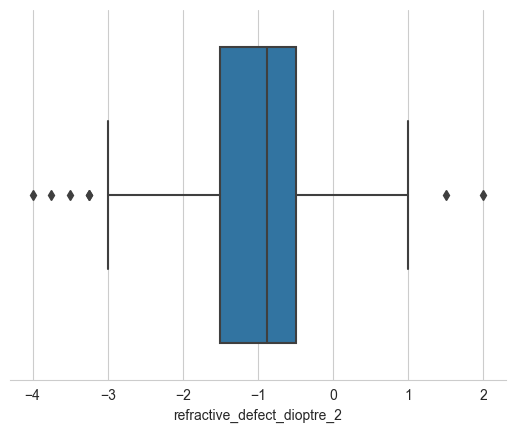

In [124]:
#OS--- removing outliers
os_clean = os_clean.drop(os_clean[os_clean['refractive_defect_dioptre_2'] == -75].index)
sns.boxplot(x=os_clean['refractive_defect_dioptre_2'])
sns.set_style("whitegrid")
sns.despine(left=True)
plt.title('OS (outlier removed)')

NameError: name 'plt' is not defined

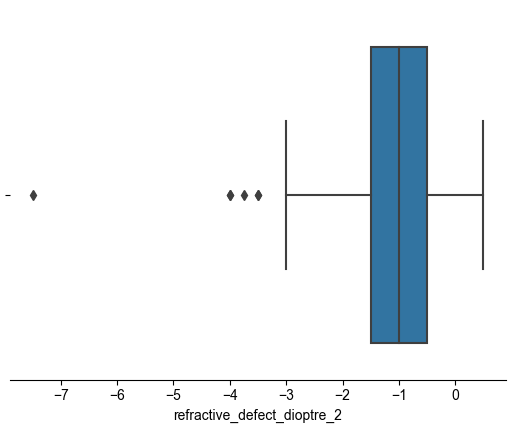

In [123]:
#OD--- removing outliers
od_clean = od_clean.drop(od_clean[od_clean['refractive_defect_dioptre_2'] == -200].index)
sns.boxplot(x=od_clean['refractive_defect_dioptre_2'])
sns.set_style("whitegrid")
sns.despine(left=True)
plt.title('OD (outlier removed)') 
plt.show() 

In [ ]:
#Filling Na's
 columns_to_fill = {
    'refractive_defect_dioptre_1': {'fill_method': 'mean', 'round_to': 0.25},
    'refractive_defect_dioptre_2': {'fill_method': 'mean', 'round_to': 0.25},
    'refractive_defect_astigmatism': {'fill_method': 'mean', 'round_to': 1},
    'phakic/pseudophakic': {'fill_method': 'mode', 'round_to': None},
    'iop_pneumatic': {'fill_method': 'mean', 'round_to': 1},
    'iop_perkins': {'fill_method': 'mean', 'round_to': 1},
    'pachymetry': {'fill_method': 'mean', 'round_to': 1},
    'axial_length': {'fill_method': 'constant', 'fill_value': 26, 'round_to': None},
    'vf_md': {'fill_method': 'mean', 'round_to': 0.01}
}
#OD--- 
for col_name, col_info in columns_to_fill.items():
    if col_info['fill_method'] == 'mean':
        mean_val = round(od_clean[col_name].mean()/col_info['round_to'])*col_info['round_to'] 
        od_clean[col_name].fillna(mean_val, inplace=True)
    elif col_info['fill_method'] == 'mode':
        mode_val = od_clean[col_name].mode().iloc[0]
        od_clean[col_name].fillna(mode_val, inplace=True)
    elif col_info['fill_method'] == 'constant':
        od_clean[col_name].fillna(col_info['fill_value'], inplace=True)
    if col_info['round_to'] is not None:
        od_clean[col_name] = round(od_clean[col_name] / col_info['round_to']) * col_info['round_to']
#OS---
for col_name, col_info in columns_to_fill.items():
    if col_info['fill_method'] == 'mean':
        mean_val = round(os_clean[col_name].mean()/col_info['round_to'])*col_info['round_to'] 
        os_clean[col_name].fillna(mean_val, inplace=True)
    elif col_info['fill_method'] == 'mode':
        mode_val = os_clean[col_name].mode().iloc[0]
        os_clean[col_name].fillna(mode_val, inplace=True)
    elif col_info['fill_method'] == 'constant':
        os_clean[col_name].fillna(col_info['fill_value'], inplace=True)
    if col_info['round_to'] is not None:
        os_clean[col_name] = round(os_clean[col_name] / col_info['round_to']) * col_info

In [ ]:
#Confirming no duplicates
duplicates = od_clean.duplicated()
print(od_clean[duplicates == True])
duplicates = os_clean.duplicated()
print(os_clean[duplicates == True])

Empty DataFrame
Columns: [(, ID), (Age, Age), (Gender, Gender), (Diagnosis, Diagnosis), (Refractive_Defect, dioptre_1), (Refractive_Defect, dioptre_2), (Refractive_Defect, astigmatism), (Phakic/Pseudophakic, Phakic/Pseudophakic), (IOP, Pneumatic), (IOP, Perkins), (Pachymetry, Pachymetry), (Axial_Length, Axial_Length), (VF_MD, VF_MD)]
Index: []
Empty DataFrame
Columns: [(, ID), (Age, Age), (Gender, Gender), (Diagnosis, Diagnosis), (Refractive_Defect, dioptre_1), (Refractive_Defect, dioptre_2), (Refractive_Defect, astigmatism), (Phakic/Pseudophakic, Phakic/Pseudophakic), (IOP, Pneumatic), (IOP, Perkins), (Pachymetry, Pachymetry), (Axial_Length, Axial_Length), (VF_MD, VF_MD)]
Index: []


In [ ]:
#confirming all lower case
od_clean['phakic/pseudophakic'] = od_clean['phakic/pseudophakic'].str.lower()
os_clean['phakic/pseudophakic'] = os_clean['phakic/pseudophakic'].str.lower()
od_clean['diagnosis'] = od_clean['diagnosis'].str.lower()
os_clean['diagnosis'] = os_clean['diagnosis'].str.lower()
od_clean['gender'] = od_clean['gender'].str.lower()
os_clean['gender'] = os_clean['gender'].str.lower()

In [ ]:
#Changing phakic/pseudophakic to actual names rather than sentences

od_clean['phakic/pseudophakic'] = od_clean['phakic/pseudophakic'].replace({'crystalline lens has been removed ': 'pseudophakic', 'the eye keeps the lens':'phakic'})
os_clean['phakic/pseudophakic'] = os_clean['phakic/pseudophakic'].replace({'crystalline lens has been removed ':'pseudophakic', 'the eye keeps the lens':'phakic'})

## Problem 3- Data Visualization